# 고객 정보 & 만족도 상관관계

데이터준비

In [ ]:
#로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package 를 import하기
from google.colab import files
import io
import pandas as pd
import numpy as np

#files.upload()에 의해 [파일 선택]버튼이 생성됨
uploaded = files.upload()

In [ ]:
#read_csv()로 업로드된 파일을 Byte단위로 읽어서 데이터 프레임을 생성함
data = pd.read_csv(io.BytesIO(uploaded['airline_passenger_satisfaction.csv']))


# #train 데이터 프레임의 기본 정보 확인하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import os
from google.colab import files
import io
import numpy as np

data = pd.read_csv('airline_passenger_satisfaction(age_group).csv')

# 디렉토리 생성
output_dir = 'customer_segment_plots'
os.makedirs(output_dir, exist_ok=True)

# 만족도 관련 컬럼들
satisfaction_columns = [
    'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
    'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
    'Cleanliness', 'Satisfaction'
]

satisfaction_columns_wo_satisfaction = [
    'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
    'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
    'Cleanliness'
]

#기초 통계 출력 함수
def print_descriptive_statistics(segment, satisfaction_columns):
    stats = segment[satisfaction_columns].describe()
    styled_stats = stats.style.format("{:.2f}")
    display(styled_stats)

# 텍스트 변환 딕셔너리
age_group_dict = {-1: 'Under 10', 0: '10-19', 1: '20-29', 2: '30-39', 3: '40-49', 4: '50-59', 5: '60+'}
customer_type_dict = {0: 'disloyal Customer', 1: 'Loyal Customer'}
type_of_travel_dict = {0: 'Personal Travel', 1: 'Business Travel'}
class_dict = {0: 'Eco Plus', 1: 'Eco', 2: 'Business'}

# age_group 범주 값 숫자로 변환
data['age_group'] = data['age_group'].replace({'10~19': 0, '20~29': 1, '30~39': 2, '40~49':3, '50~59':4, '60+':5})

# 고객 그룹화 및 각 세그먼트 크기 계산
grouped = data.groupby(['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# 상위 10개 그룹 선택
top_10_groups = grouped.sort_values(by='Count', ascending=False).head(10)

In [ ]:
# Gender 열의 값을 숫자로 변환
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

# Customer Type 열의 값을 숫자로 변환
data['Customer_Type'] = data['Customer_Type'].replace({'Loyal': 1, 'disloyal': 0})

# Type of Travel 열의 값을 숫자로 변환
data['Type_of_Travel'] = data['Type_of_Travel'].replace({'P': 0, 'B': 1})

# Class 열의 값을 숫자로 변환
data['Class'] = data['Class'].replace({'Business': 2, 'Eco': 1, 'Eco Plus': 0})

#satisfaction 변환
data['Satisfaction'] = data['Satisfaction'].replace({'D':0, 'S':1})

# 변환된 데이터 확인
print(data.head())

   id  Gender  age_group  Customer_Type  Type_of_Travel  Class  \
0   1       1          3              0               1      2   
1   2       0          2              1               1      2   
2   3       1          3              1               1      2   
3   4       1          4              1               1      2   
4   5       0          3              1               1      2   

   Flight_Distance  Departure_Delay  Arrival_Delay  Inflight_wifi_service  \
0              821                2              5                      3   
1              821               26             39                      2   
2              853                0              0                      4   
3             1905                0              0                      2   
4             3470                0              1                      3   

   ...  Online_boarding  Seat_comfort  Inflight_entertainment  \
0  ...                3             5                       5   
1  ...    

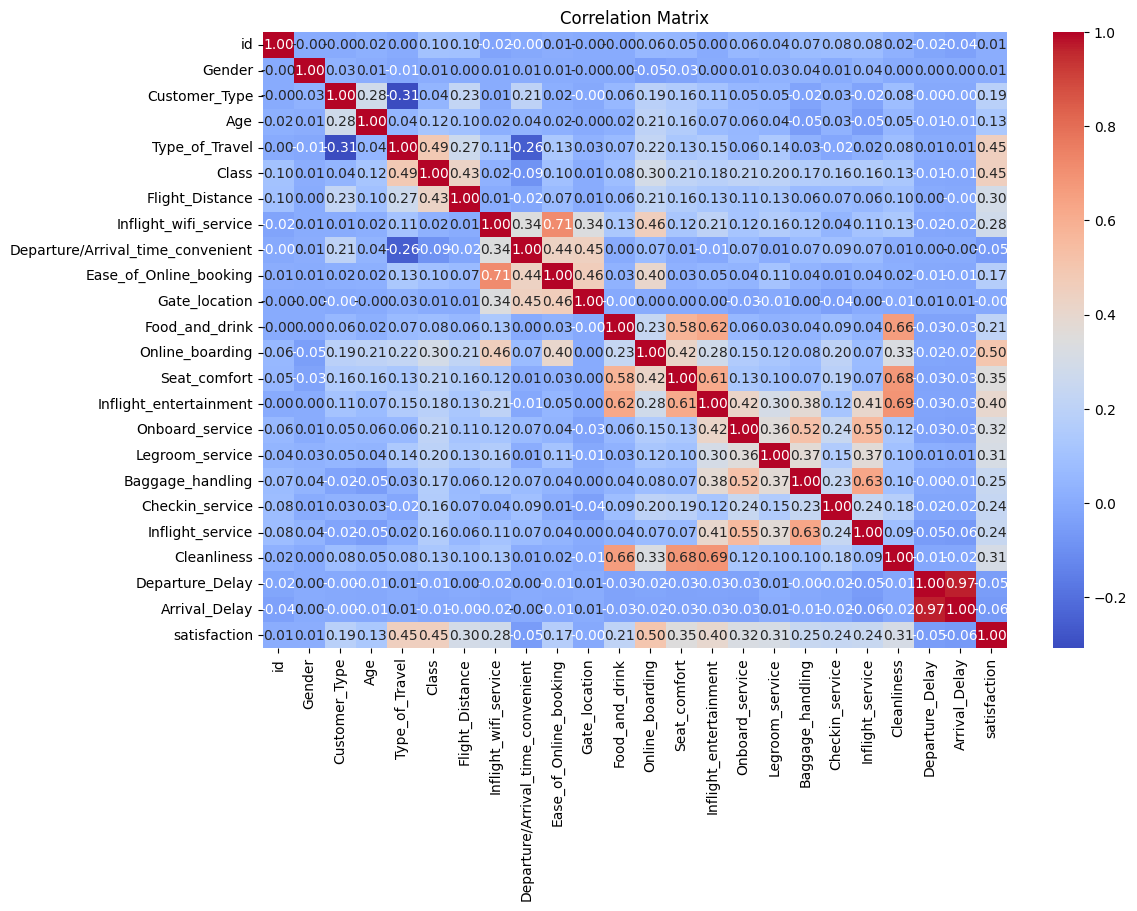

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 컬럼 상관관계 분석
correlation_matrix = data.corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 절댓값이 0.3보다 큰 상관관계를 가지는 변수 쌍 찾기
strong_correlations = correlation_matrix[((correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)) & (correlation_matrix != 1)]

strong_correlations_stack = strong_correlations.stack().reset_index()
strong_correlations_stack.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlations_stack['Absolute Correlation'] = strong_correlations_stack['Correlation'].abs()
strong_correlations_stack = strong_correlations_stack.sort_values('Absolute Correlation', ascending=False)
strong_correlations_stack = strong_correlations_stack.drop('Absolute Correlation', axis=1)

print(strong_correlations_stack.to_string(index=False))

                       Variable 1                        Variable 2  Correlation
                    Arrival_Delay                   Departure_Delay     0.965291
                  Departure_Delay                     Arrival_Delay     0.965291
            Inflight_wifi_service            Ease_of_Online_booking     0.714807
           Ease_of_Online_booking             Inflight_wifi_service     0.714807
           Inflight_entertainment                       Cleanliness     0.692511
                      Cleanliness            Inflight_entertainment     0.692511
                     Seat_comfort                       Cleanliness     0.679613
                      Cleanliness                      Seat_comfort     0.679613
                   Food_and_drink                       Cleanliness     0.658054
                      Cleanliness                    Food_and_drink     0.658054
                 Baggage_handling                  Inflight_service     0.629237
                 Inflight_se

#  1. 고객, 출발/도착 지연시간  & 와이파이 서비스

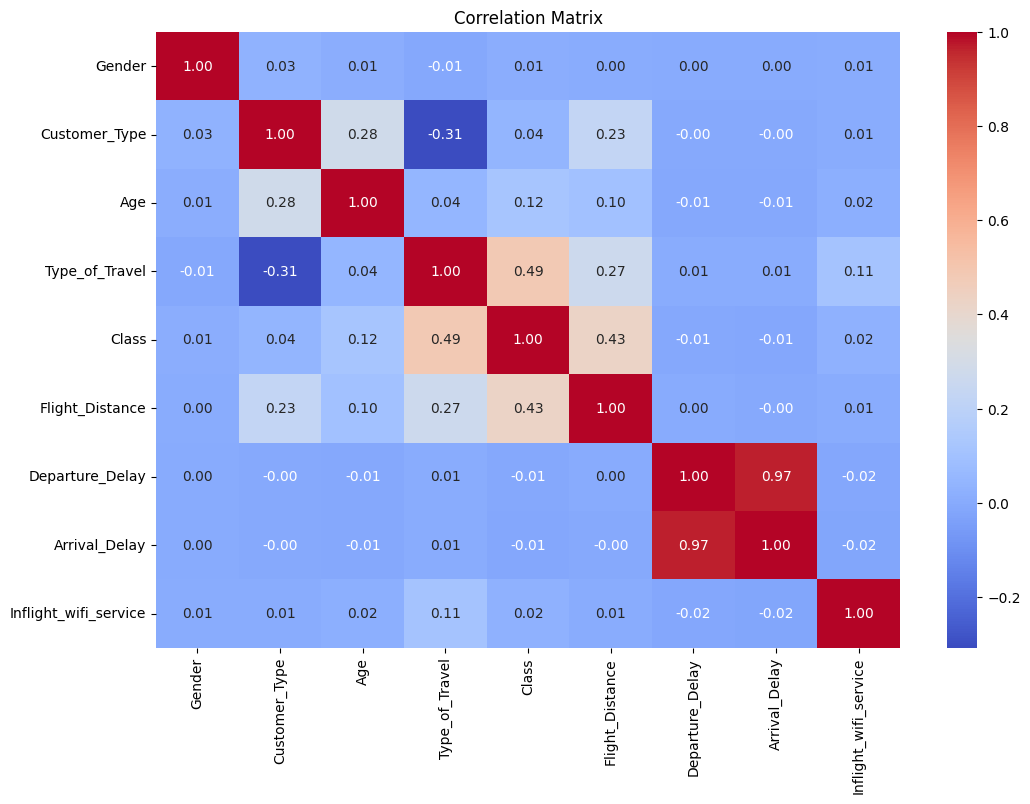

In [ ]:
# 상관관계 분석 - 고객, 출발/도착 지연시간  & 와이파이 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Inflight_wifi_service']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  2.고객정보, 출발/도착 지연시간 & 출발/도착 만족도

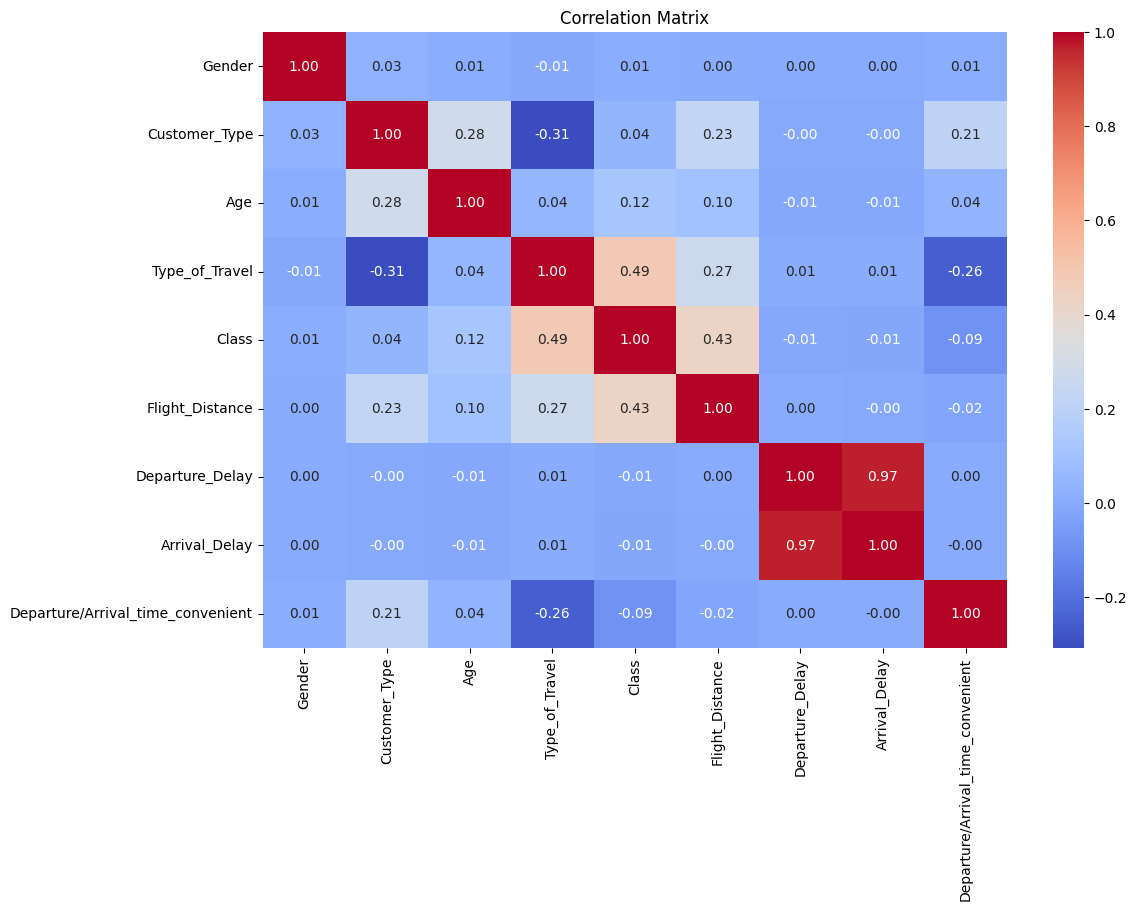

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 출발/도착 만족도
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance','Departure_Delay', 'Arrival_Delay', 'Departure/Arrival_time_convenient']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  3. 고객정보, 출발/도착 지연시간, 온라인 예약 만족도

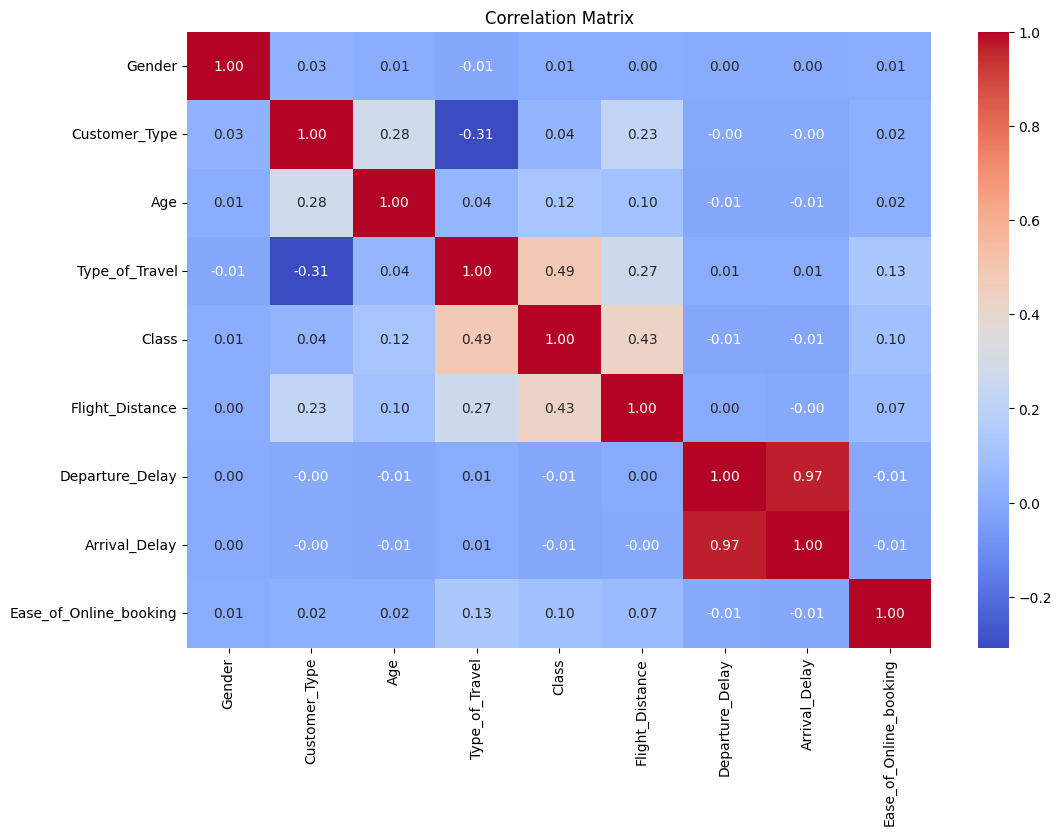

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간, 온라인 예약 만족도
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Ease_of_Online_booking']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  4. 고객정보, 출발/도착 지연시간 & 게이트 위치

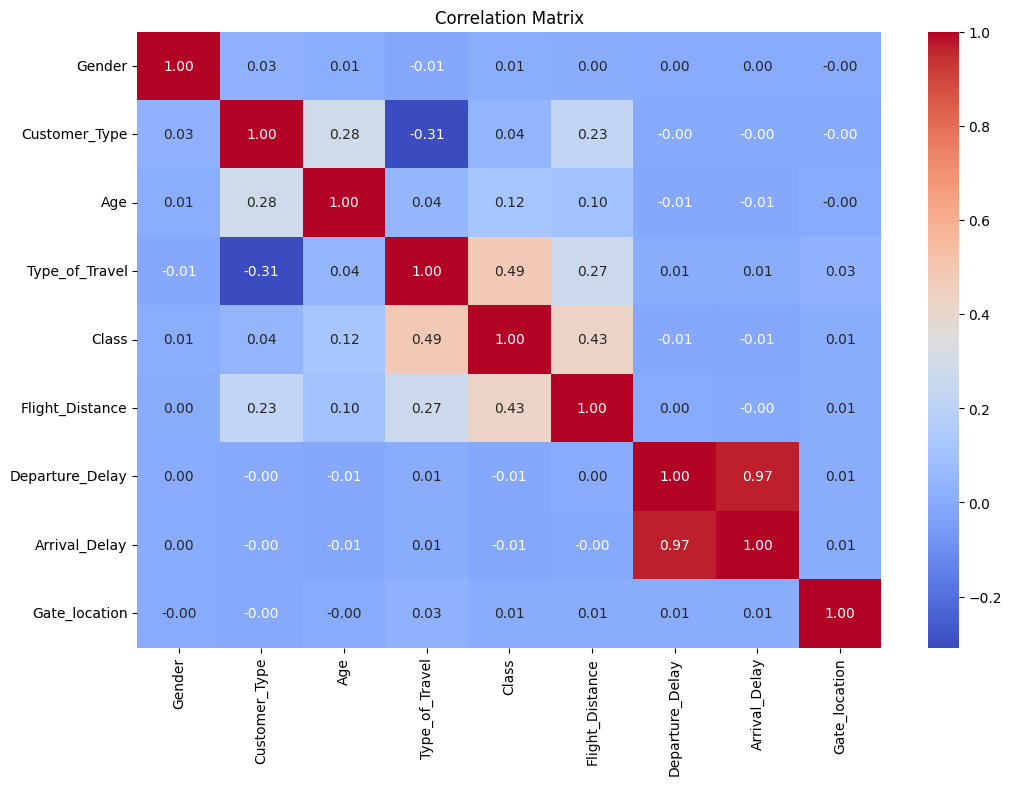

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 게이트 위치
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Gate_location']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  5. 고객정보, 출발/도착 지연시간 & 식음료 만족도

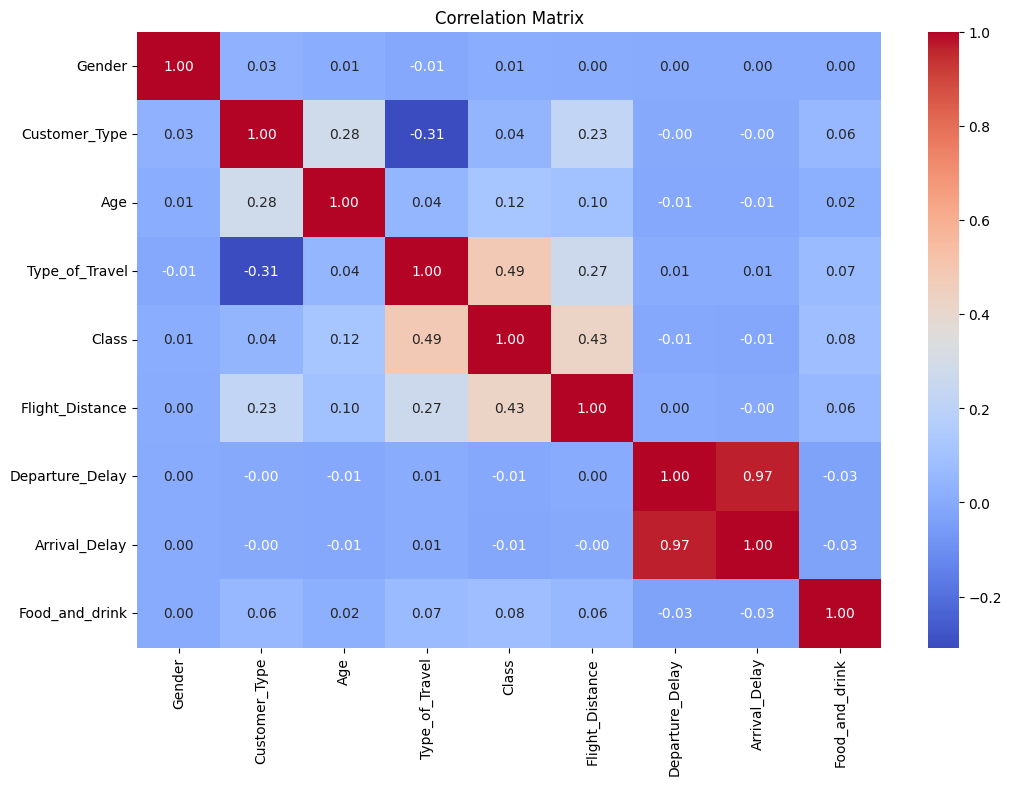

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 식음료 만족도
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Food_and_drink']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  6. 고객정보, 출발/도착 지연시간 & 온라인 보딩

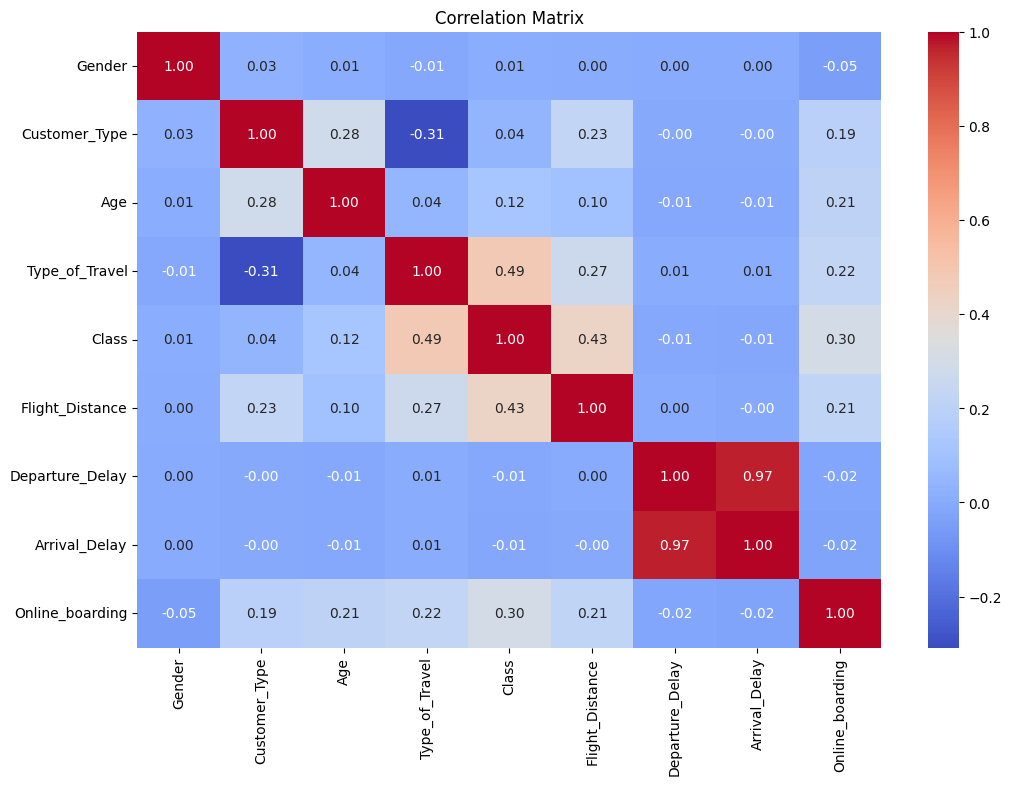

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 온라인 보딩
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Online_boarding']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  7. 고객정보, 출발/도착 지연시간 & 좌석 만족도

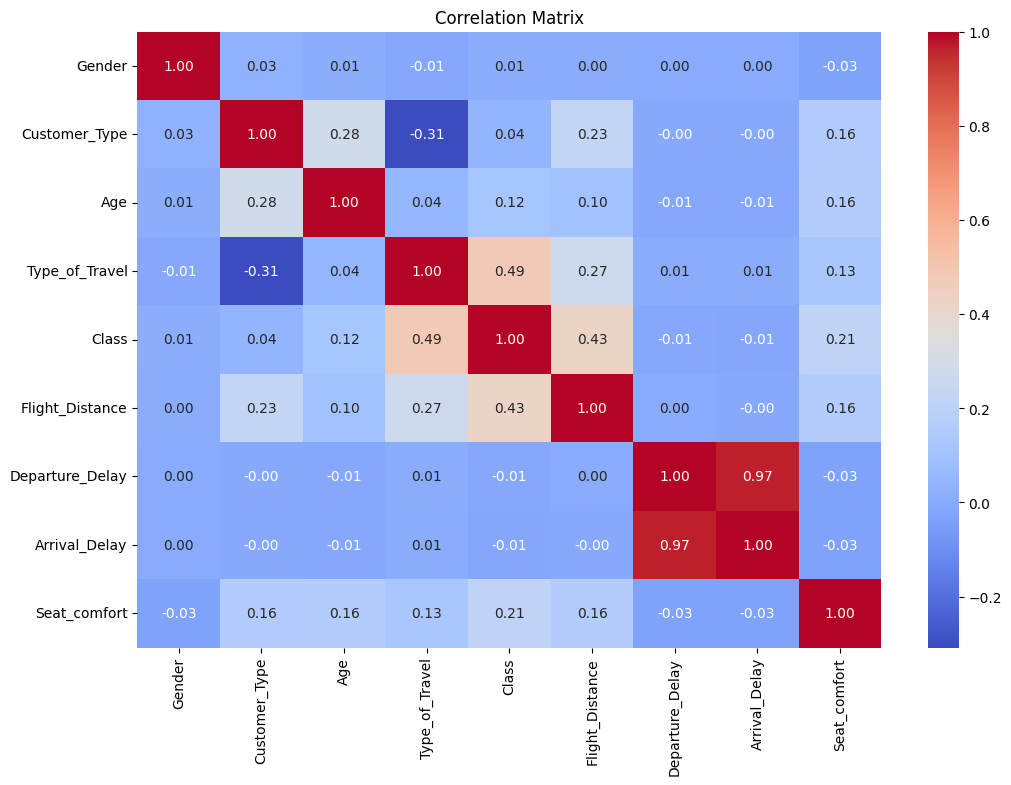

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 좌석 만족도
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Seat_comfort']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  8. 고객정보, 출발/도착 지연시간 & 기내 오락

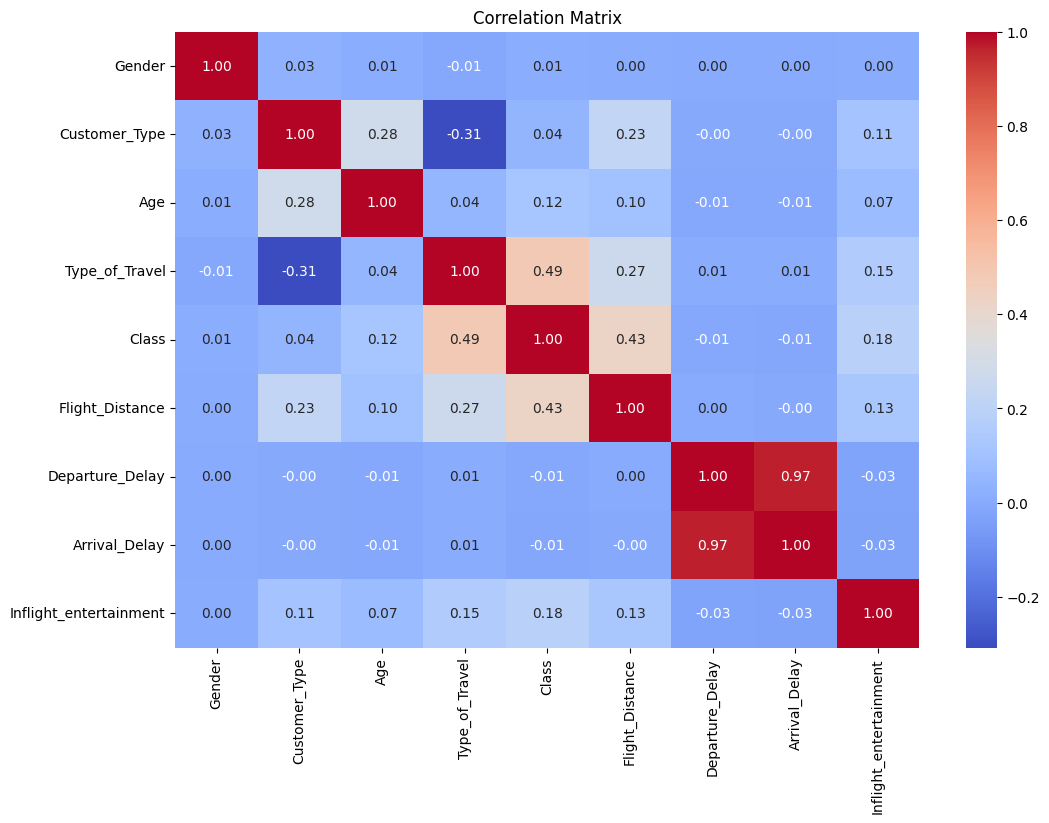

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 기내 오락
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Inflight_entertainment']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  9. 고객정보, 출발/도착 지연시간 & 온보드 서비스

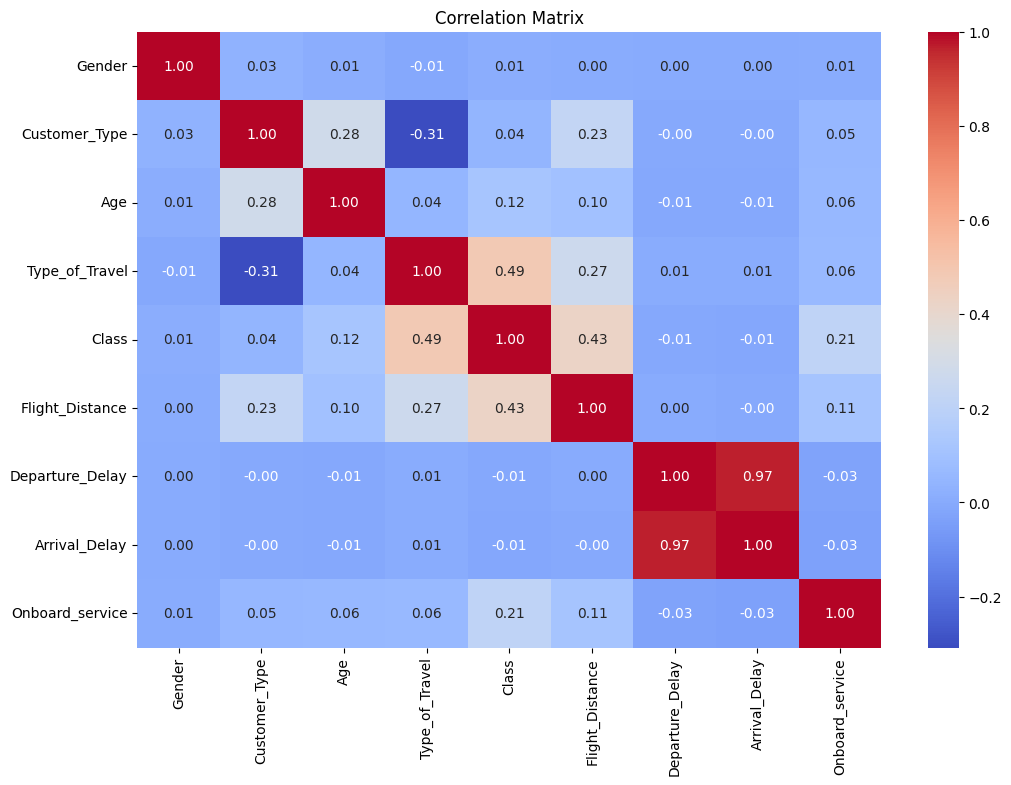

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 온보드 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Onboard_service']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  10. 고객정보, 출발/도착 지연시간 & 레그룸 서비스

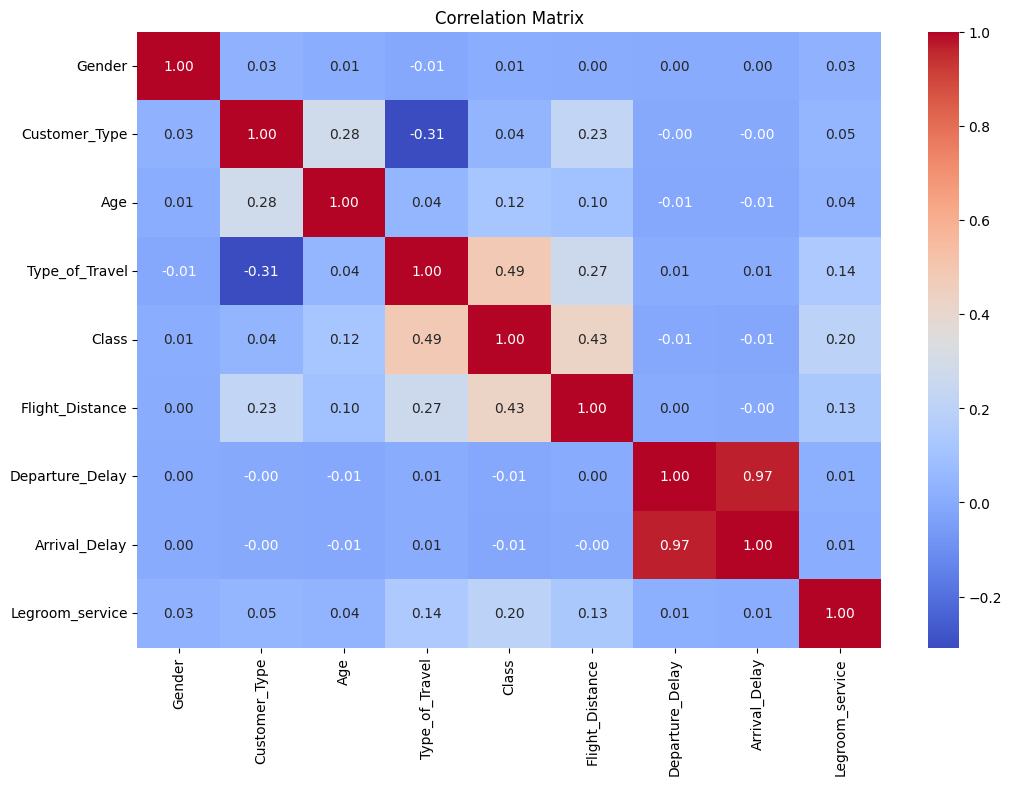

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 레그룸 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Legroom_service']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  11. 고객정보, 출발/도착 지연시간 & 수화물 관리

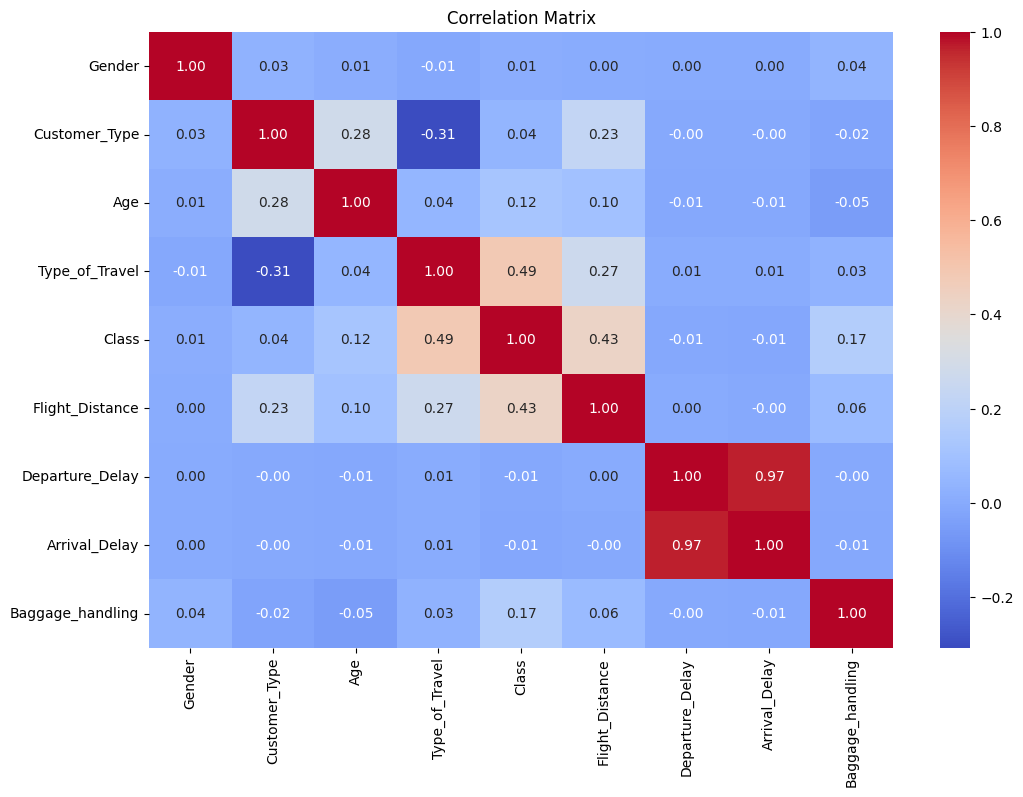

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 레그룸 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Baggage_handling']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  12. 고객정보, 출발/도착 지연시간 & 체크인 서비스

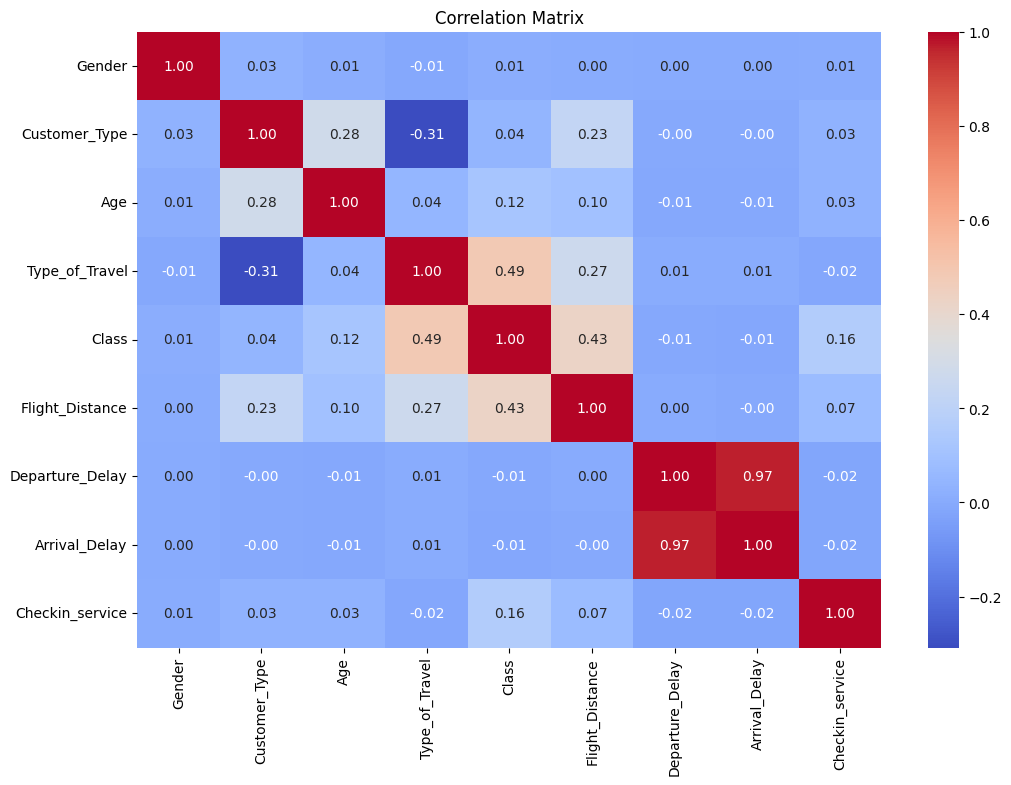

In [ ]:
# 상관관계 분석 - 출발/도착 지연시간 & 레그룸 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Checkin_service']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  13. 고객정보, 출발/도착 지연시간 & 기내 서비스

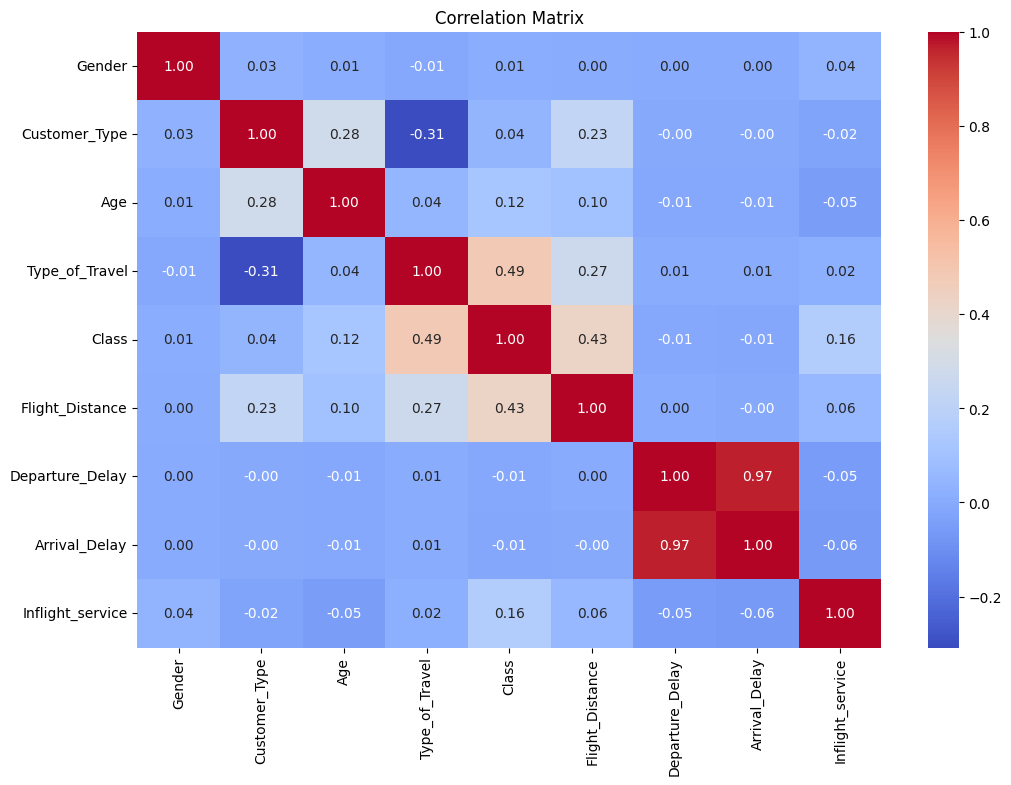

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 기내 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Inflight_service']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  14. 고객정보, 출발/도착 지연시간 & 청결도

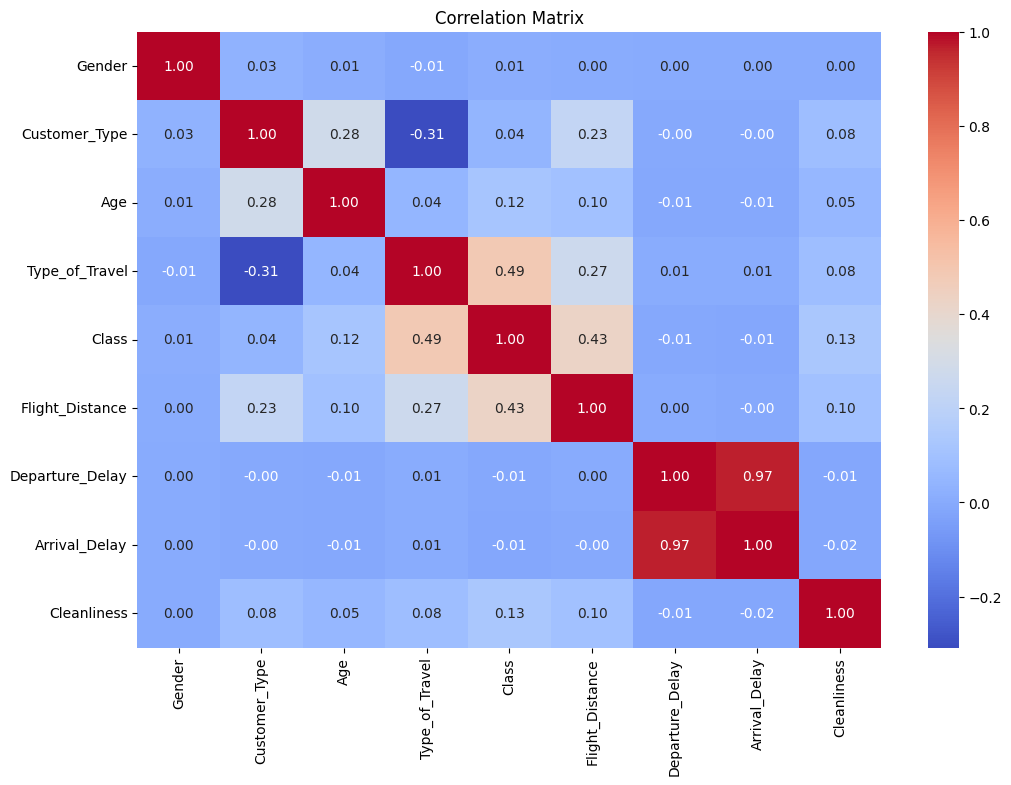

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 기내 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'Cleanliness']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  15. 고객정보, 출발/도착 지연시간 & 종합 만족도

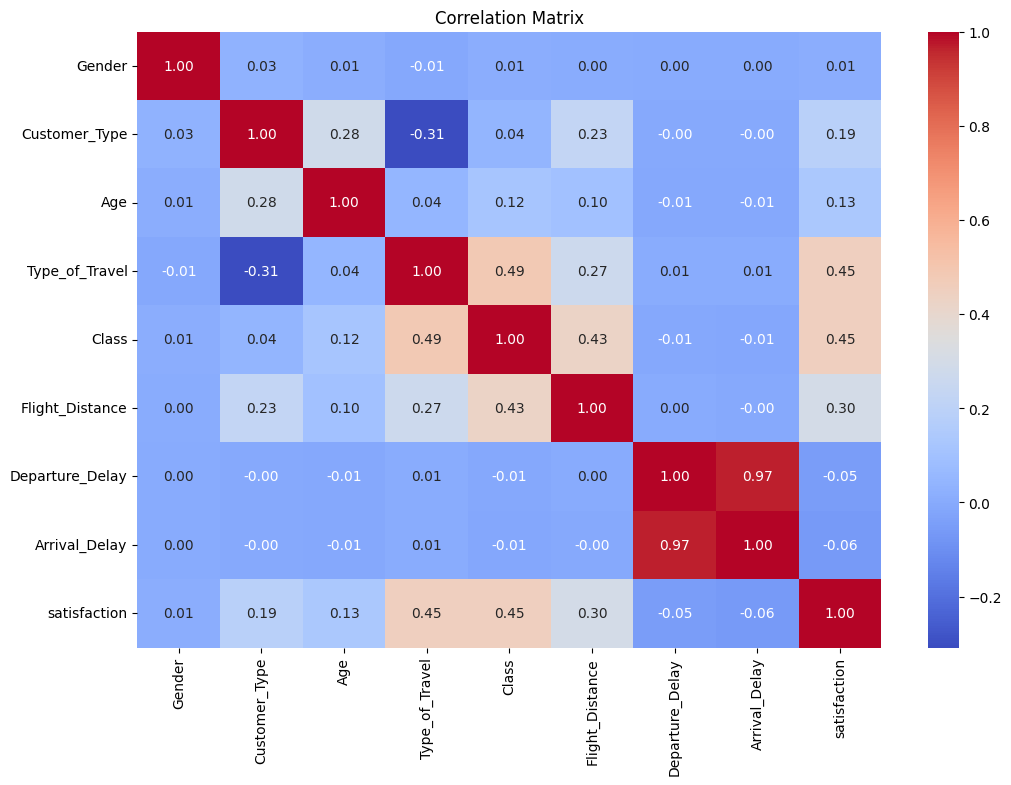

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 기내 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay', 'Arrival_Delay', 'satisfaction']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

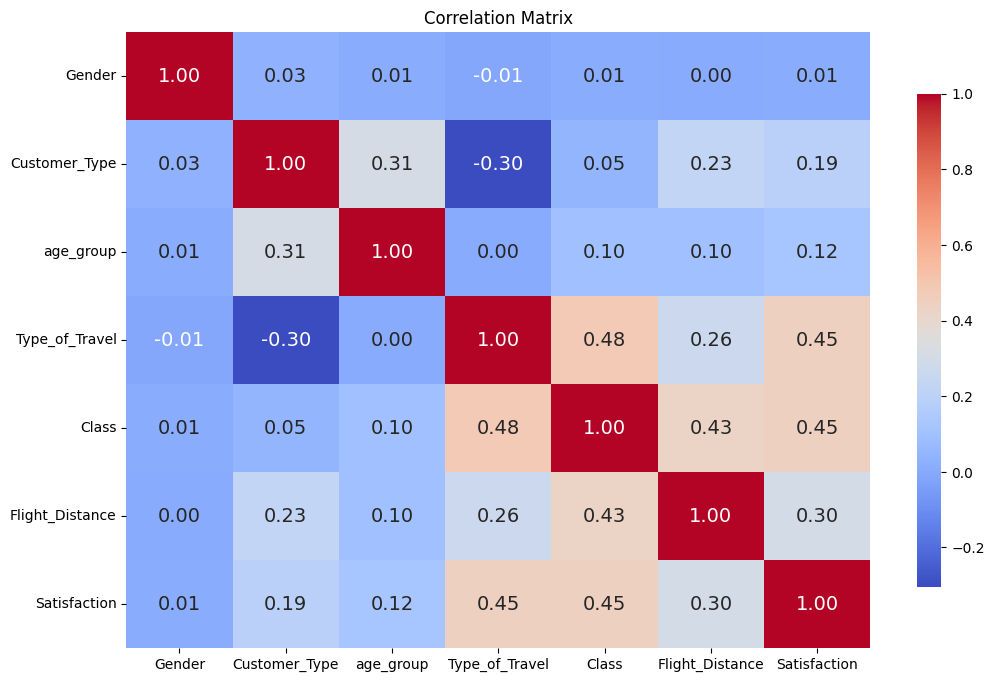

In [ ]:
# 상관관계 분석 - 고객정보, 출발/도착 지연시간 & 기내 서비스
correlation_matrix = data[['Gender', 'Customer_Type', 'age_group', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Satisfaction']].corr()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()